In [1]:
# Install dependencies if needed
!pip install seaborn scikit-learn --quiet

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
from google.colab import files
uploaded = files.upload()

Saving TapToBuy.csv to TapToBuy.csv


In [4]:
# Load the dataset
df = pd.read_csv('TapToBuy.csv')

# Show basic info
print(df.head())
print(df.info())
print(df.isnull().sum())

# Handle Missing Values
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='mean')

categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']

df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Encode categorical values
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Drop ID
df.drop('ID', axis=1, inplace=True)

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  
0            Low          4.0  
1        Average          3.0  
2            Low          1.0  
3           High          2.0  
4           High          6.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               4832 non-null   int64  
 1   Gender           4832 non-null   object 
 2   Ever_Married     4747 non-

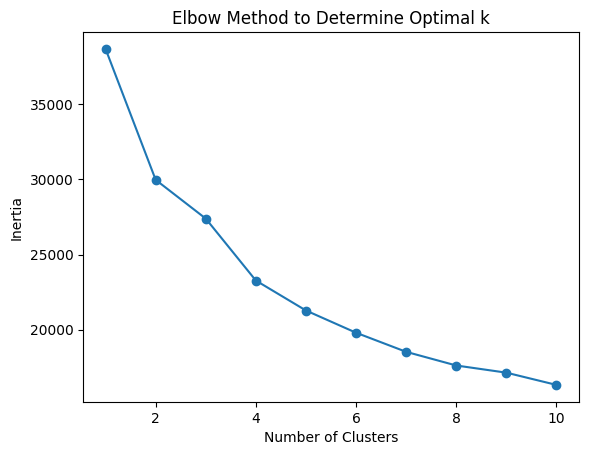

In [5]:
# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


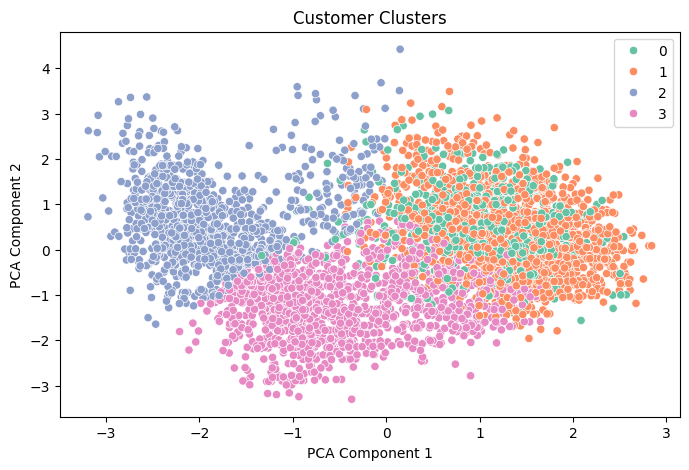

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Cluster,,,,,,,,
0,0.634921,0.962482,70.610390,0.554113,5.685426,1.470731,1.486291,2.088102
1,0.596806,1.000000,47.024617,0.760479,1.470393,2.498543,0.242848,3.183723
2,0.569218,0.119707,27.323290,0.171010,4.211726,2.752344,1.958469,3.965920
3,0.424006,0.371449,40.147727,0.886364,1.507812,3.395281,1.988636,1.900204


In [6]:
# Choose k (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# PCA for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Analyze Clusters
df.groupby('Cluster').mean()
